<a href="https://colab.research.google.com/github/NayemHasanLoLMan/Twitter-Sentiment-Analysis-/blob/main/Twitter_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Load the dataset
df = pd.read_csv('bdCalling IT Ltd..csv')

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
df.info()

print("\nDataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         20067 non-null  object
 1   user_location     15860 non-null  object
 2   user_description  18685 non-null  object
 3   user_created      20068 non-null  object
 4   user_followers    20068 non-null  int64 
 5   user_friends      20068 non-null  int64 
 6   user_favourites   20068 non-null  int64 
 7   user_verified     20068 non-null  bool  
 8   date              20068 non-null  object
 9   text              20068 non-null  object
 10  hashtags          15771 non-null  object
 11  source            20068 non-null  object
 12  is_retweet        20068 non-null  bool  
 13  Sentiment         20068 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.9+ MB

Dataset Shape: (20068, 14)

Fi

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


Missing Values Analysis:
--------------------------------------------------
user_name: 0.00%
user_location: 20.97%
user_description: 6.89%
user_created: 0.00%
user_followers: 0.00%
user_friends: 0.00%
user_favourites: 0.00%
user_verified: 0.00%
date: 0.00%
text: 0.00%
hashtags: 21.41%
source: 0.00%
is_retweet: 0.00%
Sentiment: 0.00%


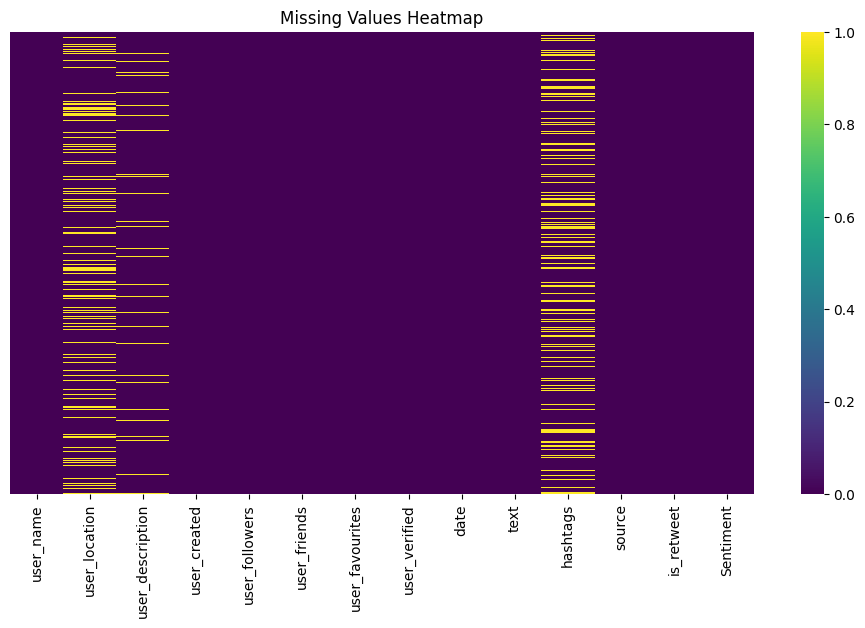

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Missing Values Analysis:")
print("-" * 50)
for column, missing in zip(df.columns, missing_percentage):
    print(f"{column}: {missing:.2f}%")

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

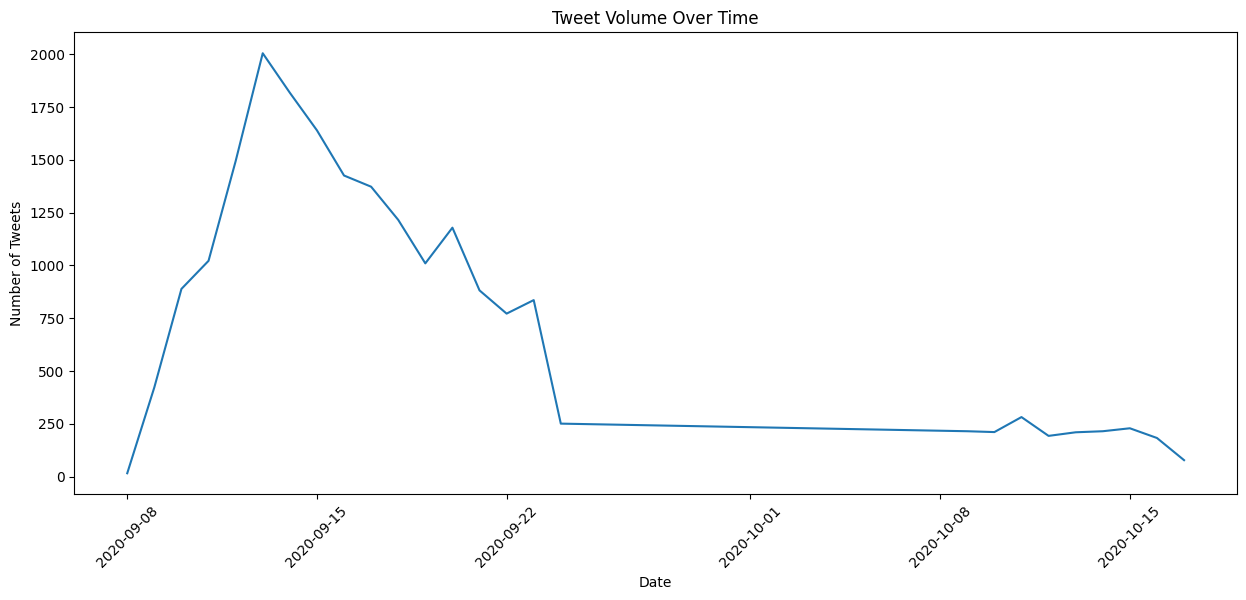

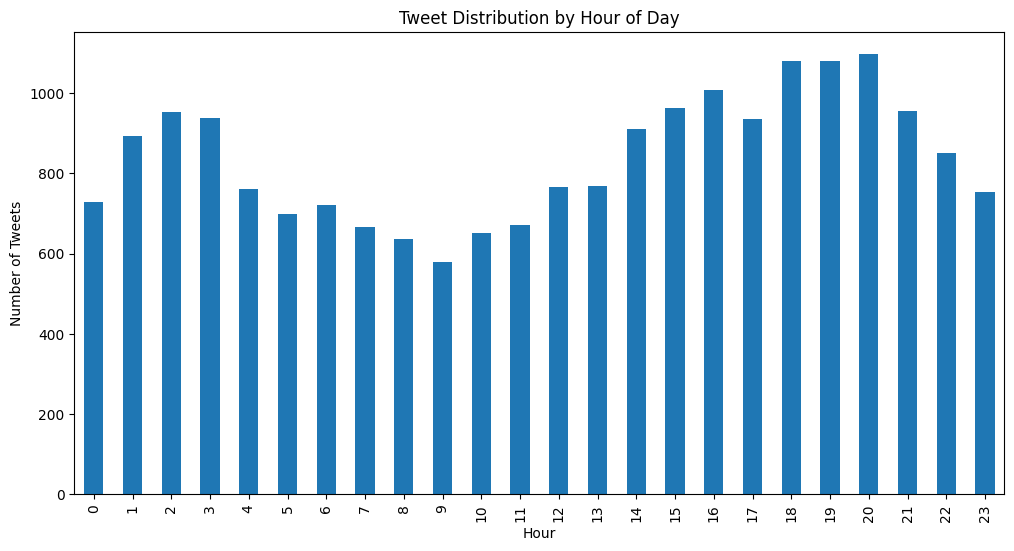

In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['user_created'] = pd.to_datetime(df['user_created'])

# Analyze tweet distribution over time
plt.figure(figsize=(15, 6))
df['date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

# Analyze tweets by hour of day
plt.figure(figsize=(12, 6))
df['date'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Tweet Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.show()

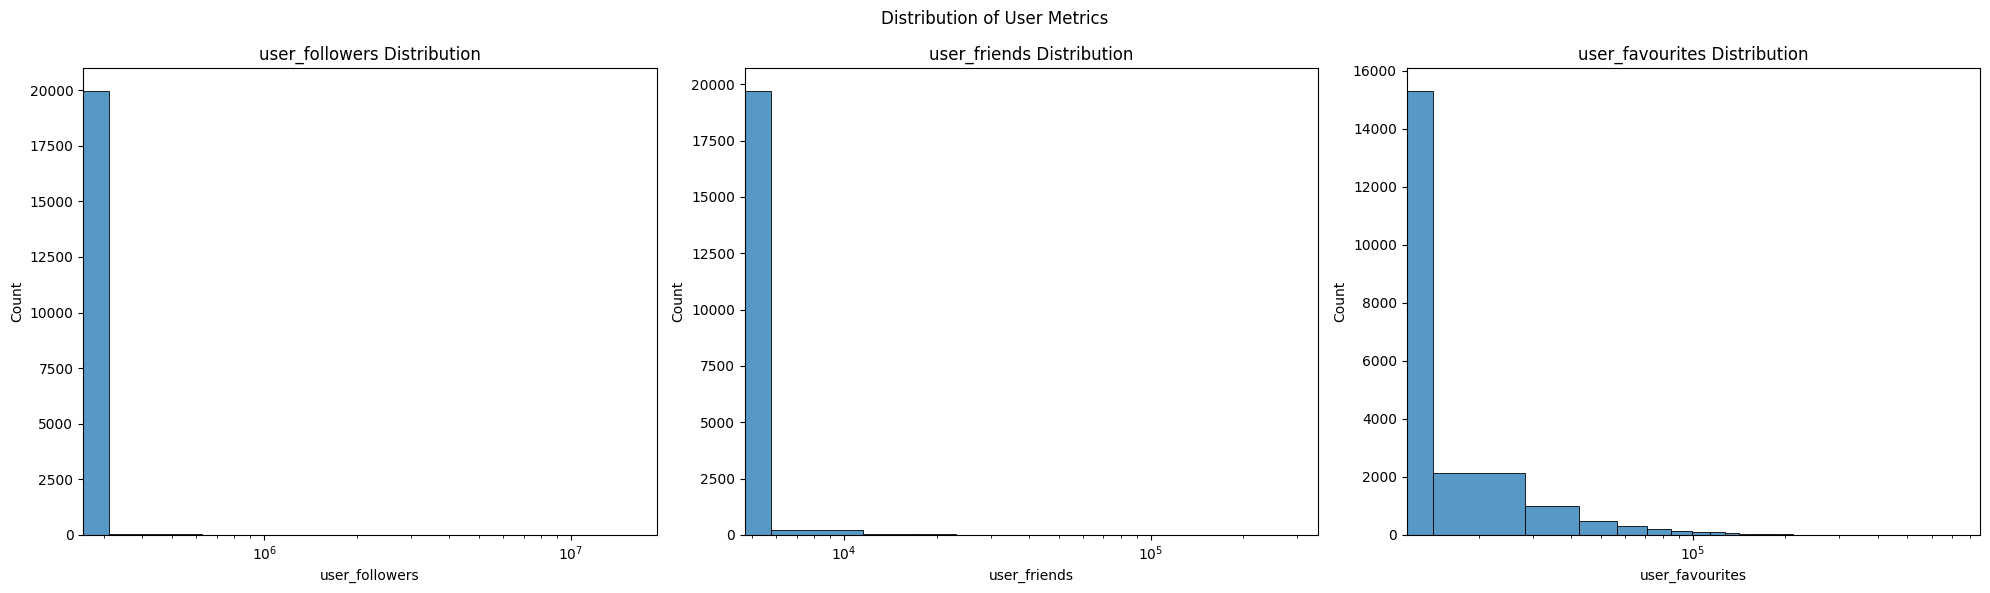

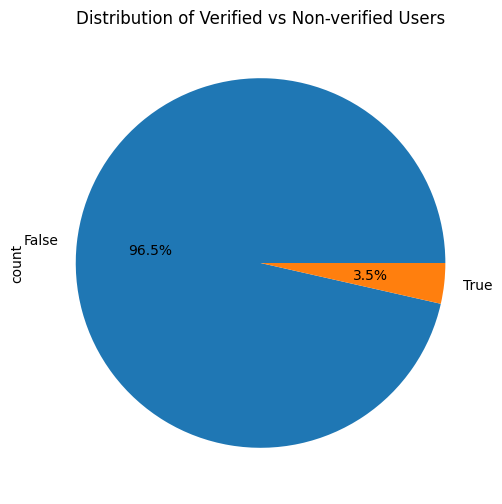

In [ ]:
# Analyze user metrics
user_metrics = ['user_followers', 'user_friends', 'user_favourites']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of User Metrics')

for i, metric in enumerate(user_metrics):
    sns.histplot(data=df[metric], ax=axes[i], bins=50)
    axes[i].set_title(f'{metric} Distribution')
    axes[i].set_xscale('log')

plt.tight_layout()
plt.show()

# Analyze verified vs non-verified users
plt.figure(figsize=(8, 6))
df['user_verified'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Verified vs Non-verified Users')
plt.show()

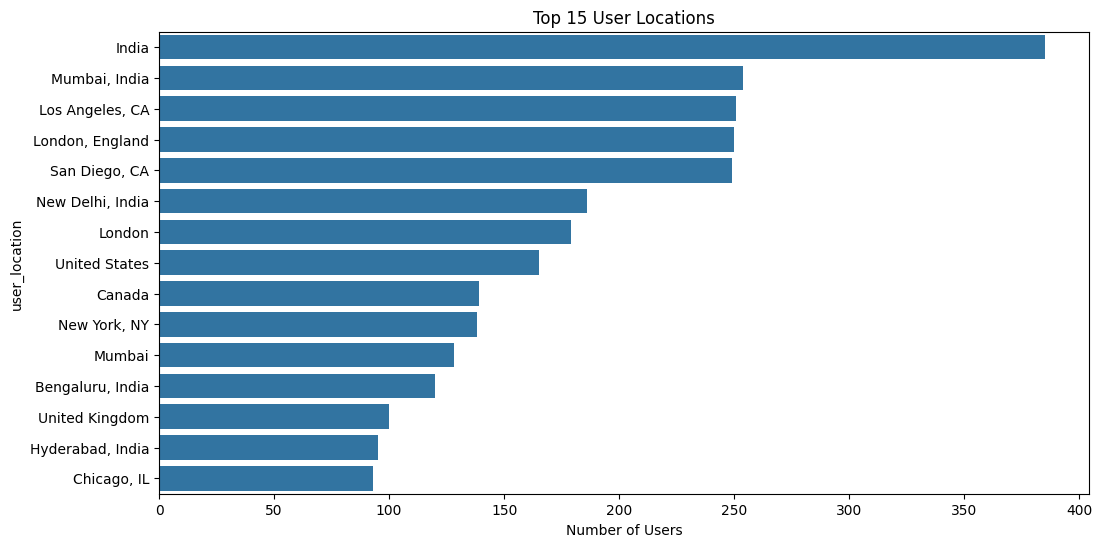

In [ ]:
# Analyze top user locations
plt.figure(figsize=(12, 6))
top_locations = df['user_location'].value_counts().head(15)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 15 User Locations')
plt.xlabel('Number of Users')
plt.show()

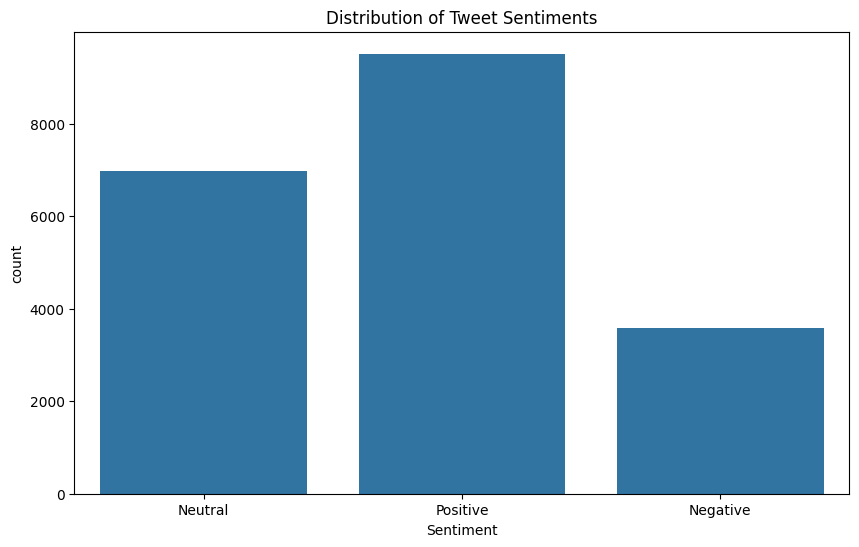

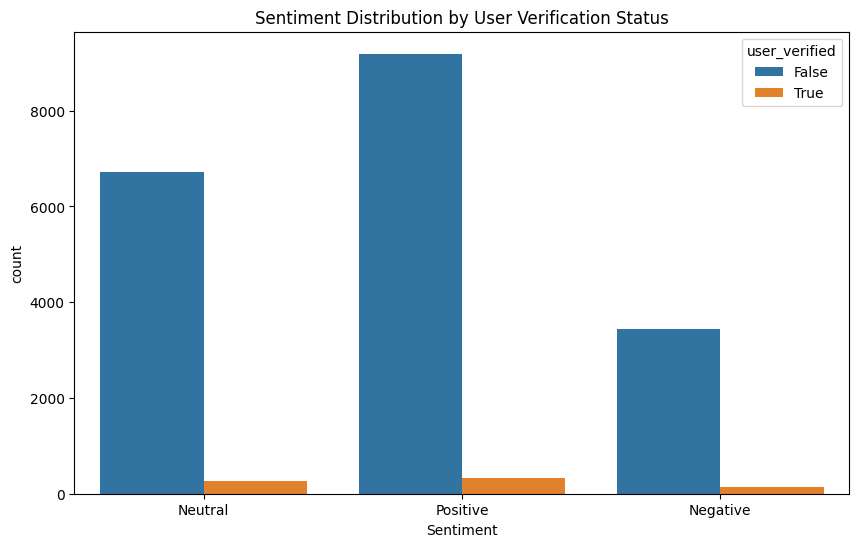

In [ ]:
# Analyze sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment')
plt.title('Distribution of Tweet Sentiments')
plt.show()

# Analyze sentiment by verified status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='user_verified')
plt.title('Sentiment Distribution by User Verification Status')
plt.show()

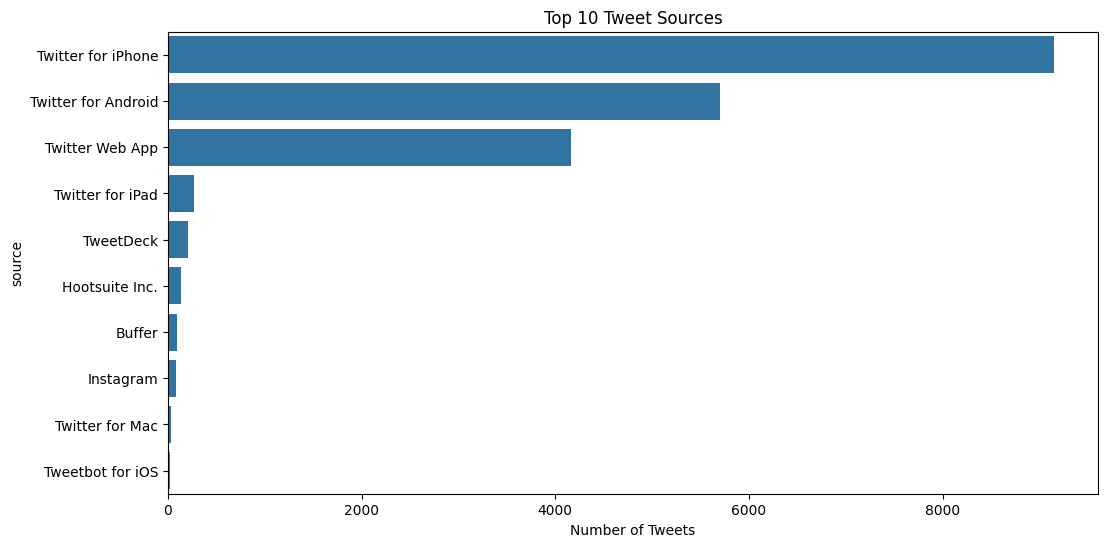

In [ ]:
# Analyze tweet sources
plt.figure(figsize=(12, 6))
top_sources = df['source'].value_counts().head(10)
sns.barplot(x=top_sources.values, y=top_sources.index)
plt.title('Top 10 Tweet Sources')
plt.xlabel('Number of Tweets')
plt.show()

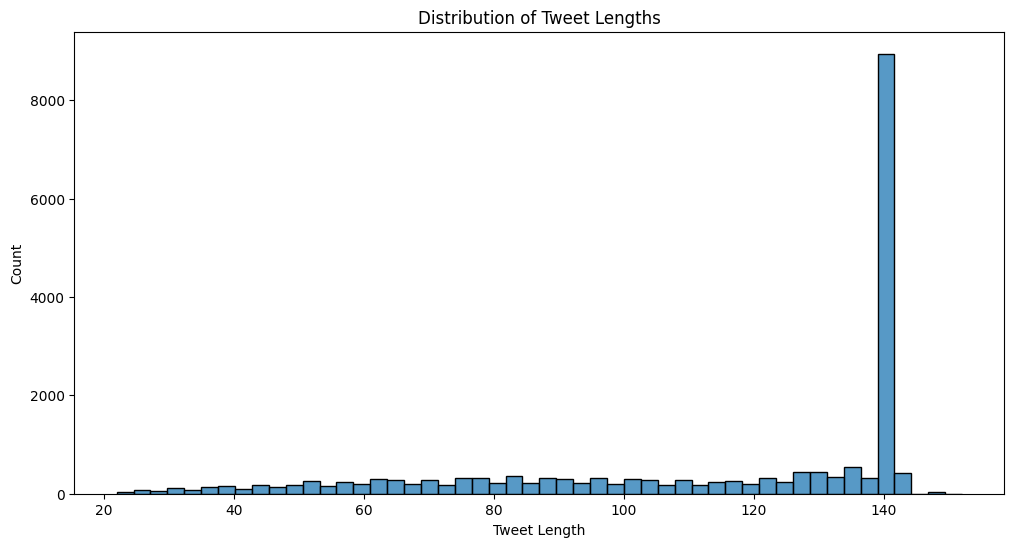

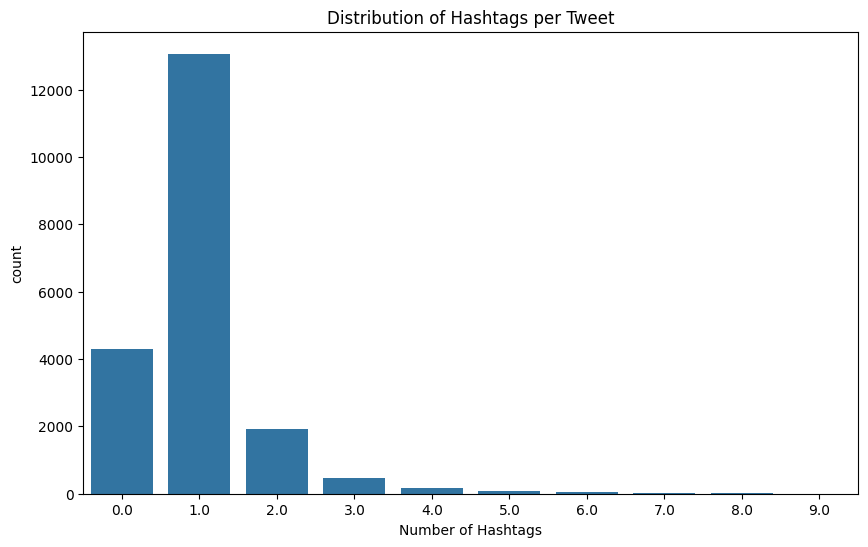

In [ ]:
# Analyze tweet lengths
df['tweet_length'] = df['text'].str.len()

plt.figure(figsize=(12, 6))
sns.histplot(data=df['tweet_length'], bins=50)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.show()

# Analyze hashtag usage
df['hashtag_count'] = df['hashtags'].str.count(',') + 1
df.loc[df['hashtags'].isnull(), 'hashtag_count'] = 0

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hashtag_count')
plt.title('Distribution of Hashtags per Tweet')
plt.xlabel('Number of Hashtags')
plt.show()

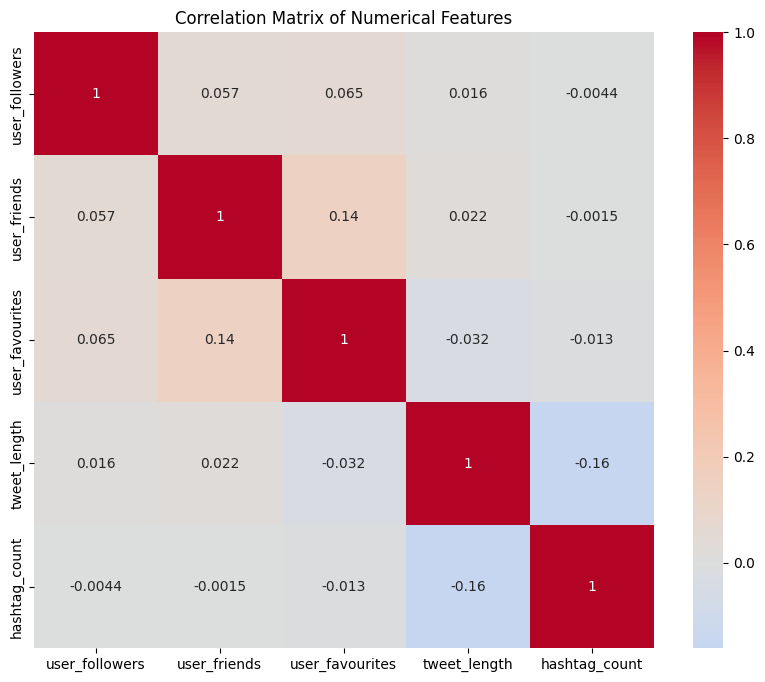

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = ['user_followers', 'user_friends', 'user_favourites', 'tweet_length', 'hashtag_count']

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Generate summary statistics
print("Summary Statistics:")
print("-" * 50)
print(df.describe())

# Generate summary for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns Summary:")
print("-" * 50)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

Summary Statistics:
--------------------------------------------------
                        user_created  user_followers   user_friends  \
count                          20068    2.006800e+04   20068.000000   
mean   2013-06-03 13:58:18.607932928    8.805132e+03    1117.027656   
min              2006-07-05 19:52:46    0.000000e+00       0.000000   
25%    2009-12-18 07:32:38.750000128    9.700000e+01     186.000000   
50%       2012-04-06 19:07:32.500000    3.660000e+02     441.000000   
75%       2016-10-02 09:53:25.500000    1.289000e+03    1001.000000   
max              2020-10-16 02:14:22    1.562443e+07  288625.000000   
std                              NaN    1.540008e+05    5169.791715   

       user_favourites                           date  tweet_length  \
count     20068.000000                          20068  20068.000000   
mean      13936.924606  2020-09-18 19:31:21.372533504    114.201266   
min           0.000000            2020-09-08 00:32:08     22.000000   
25%  

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def create_features(df):
    # Text length
    df['text_length'] = df['text'].str.len()

    # Word count
    df['word_count'] = df['text'].str.split().str.len()

    # Average word length
    df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

    # Hashtag count
    df['hashtag_count'] = df['text'].str.count('#')

    # Mention count
    df['mention_count'] = df['text'].str.count('@')

    # URL count
    df['url_count'] = df['text'].str.count('http')

    return df

# Load and preprocess data
df = pd.read_csv('bdCalling IT Ltd..csv')

# Clean text
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Create additional features
df = create_features(df)

# Encode sentiment labels
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['Sentiment'])

In [ ]:
# Tokenization and padding
MAX_WORDS = 10000
MAX_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH)

# Get additional features
additional_features = df[['text_length', 'word_count', 'avg_word_length',
                         'hashtag_count', 'mention_count', 'url_count']].values

# Split the data
X_text = padded_sequences
X_additional = additional_features
y = df['sentiment_encoded']

X_text_train, X_text_test, X_add_train, X_add_test, y_train, y_test = train_test_split(
    X_text, X_additional, y, test_size=0.2, random_state=42
)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam

# Text input branch
text_input = Input(shape=(MAX_LENGTH,))
embedding_layer = Embedding(MAX_WORDS, 100)(text_input)
lstm_layer = LSTM(64)(embedding_layer)

# Additional features branch
additional_input = Input(shape=(6,))
additional_dense = Dense(32, activation='relu')(additional_input)

# Merge branches
merged = Concatenate()([lstm_layer, additional_dense])
dense1 = Dense(64, activation='relu')(merged)
dropout = Dropout(0.3)(dense1)
output = Dense(3, activation='softmax')(dropout)

# Create and compile model
model = Model(inputs=[text_input, additional_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 100, 100)       │      1,000,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         42,240 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │            224 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 96)             │              0 │ lstm[0][0],            │
│                           │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          6,208 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 3)              │            195 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,048,867 (4.00 MB)

 Trainable params: 1,048,867 (4.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.4773 - loss: 2.7896 - val_accuracy: 0.7094 - val_loss: 0.7169
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 44s 92ms/step - accuracy: 0.7700 - loss: 0.6112 - val_accuracy: 0.7577 - val_loss: 0.5513
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.8684 - loss: 0.3711 - val_accuracy: 0.8882 - val_loss: 0.3852
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.9464 - loss: 0.1966 - val_accuracy: 0.8988 - val_loss: 0.3869
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.9693 - loss: 0.1297 - val_accuracy: 0.8851 - val_loss: 0.3841
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9731 - loss: 0.0975 - val_accuracy: 0.9022 - val_loss: 0.4162
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.9811 - loss: 0.0881 - val_accuracy: 0.8960 - val_loss: 0.4124
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9838 - loss: 0.0708 - 

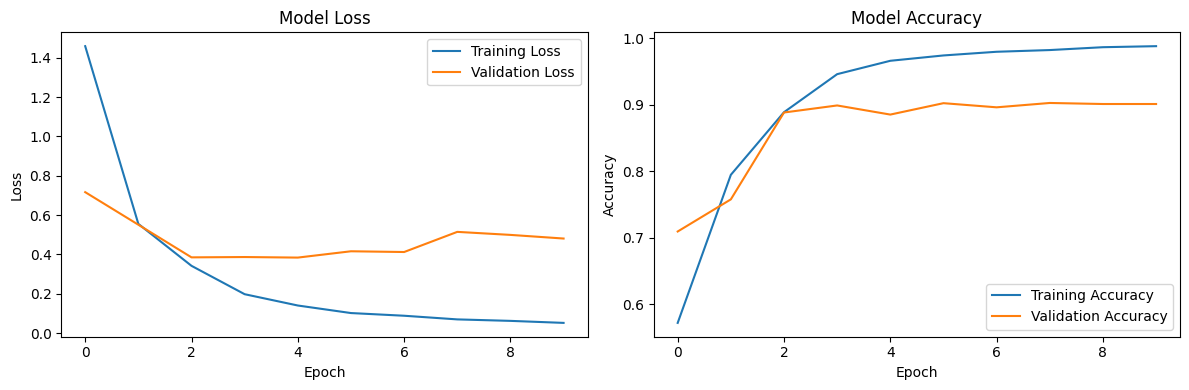

In [ ]:
# Train the model
history = model.fit(
    [X_text_train, X_add_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.80      0.82       733
     Neutral       0.93      0.94      0.94      1345
    Positive       0.92      0.93      0.93      1936

    accuracy                           0.91      4014
   macro avg       0.90      0.89      0.89      4014
weighted avg       0.91      0.91      0.91      4014



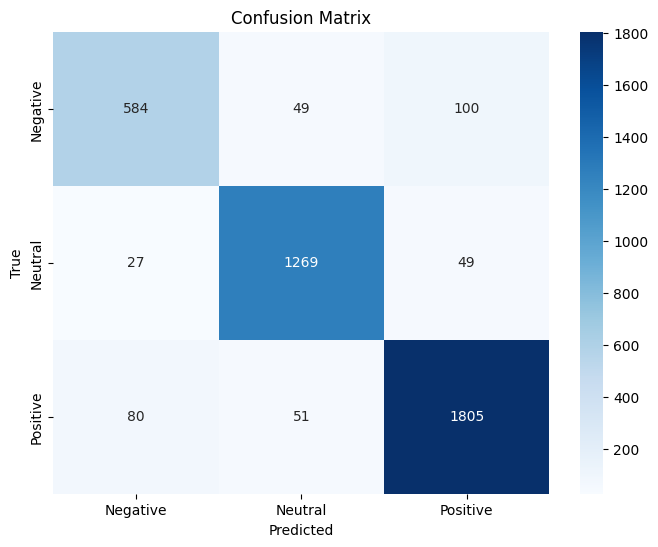

In [ ]:
# Make predictions
y_pred = model.predict([X_text_test, X_add_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes,
                          target_names=le.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<Figure size 1200x600 with 0 Axes>

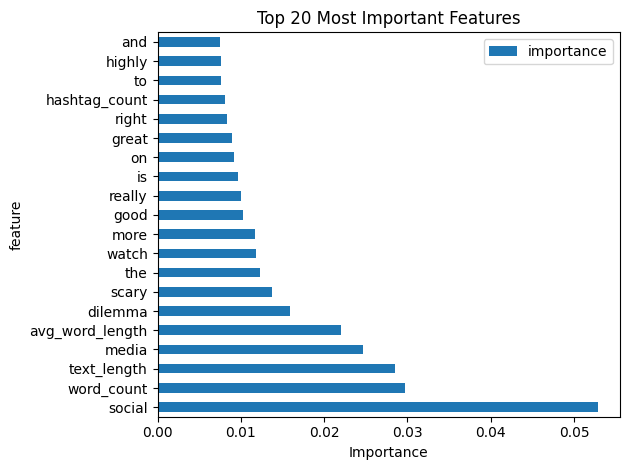

In [ ]:
# Analyze feature importance using a simpler model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_text_tfidf = tfidf.fit_transform(df['cleaned_text'])

# Combine with additional features
X_combined = np.hstack((X_text_tfidf.toarray(), X_additional))

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_combined, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': list(tfidf.get_feature_names_out()) + ['text_length', 'word_count',
                                                      'avg_word_length', 'hashtag_count',
                                                      'mention_count', 'url_count'],
    'importance': rf_model.feature_importances_
})

# Plot top 20 important features
plt.figure(figsize=(12, 6))
feature_importance.nlargest(20, 'importance').plot(
    kind='barh', x='feature', y='importance'
)
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Save the model and tokenizer
model.save('my_model.keras')
import pickle
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)
